# Analyse descriptive du jeu de données de **Airbnb**.



### Importation des bibliothèques

In [215]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")

### Chargement des données

Extraction des données à partir de google drive

In [216]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vS7x-_N9qhvDUXTxbsK1woTJwKPNXSsmu953-8cOHkoxSbgJtBmUgmG0E2tFwDCAT2eXKIlZA-omdVq/pub?gid=202319293&single=true&output=csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Exploration des données et visualisation

Explorons les données pour reconnaître les différentes relation entre l'ensemble de données.

# 1. Etudions la correlation à travers une fonction heatmap

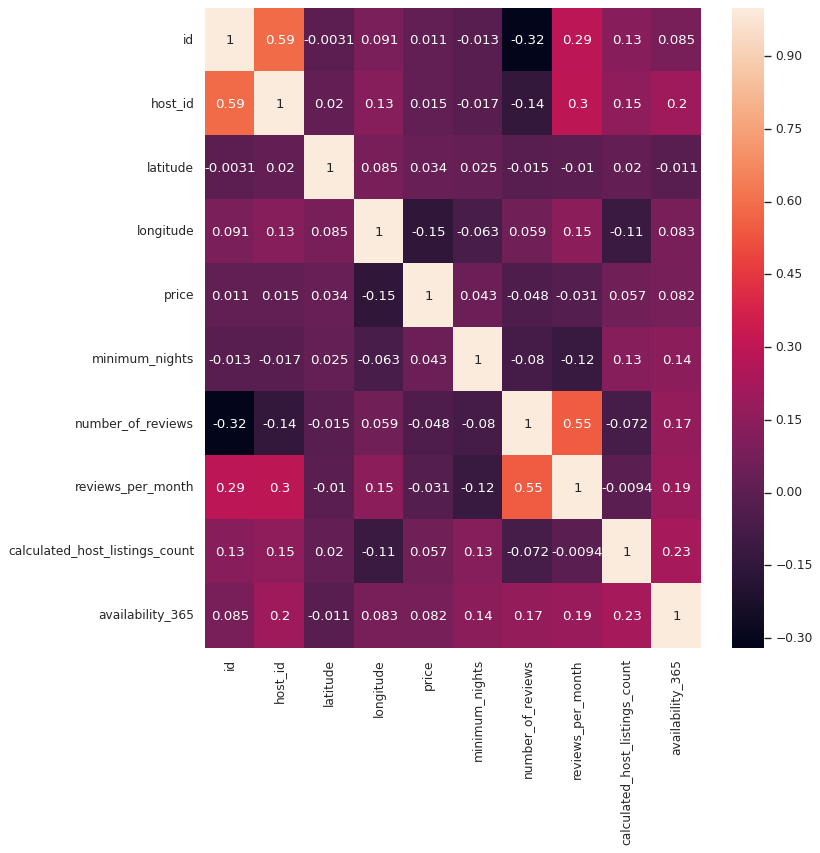

In [217]:
corr = df.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

Il y'a une corrélation négative entre le commentaire et le nombre de nuités.

# 2. Les quartiers les plus sollicités

In [218]:
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

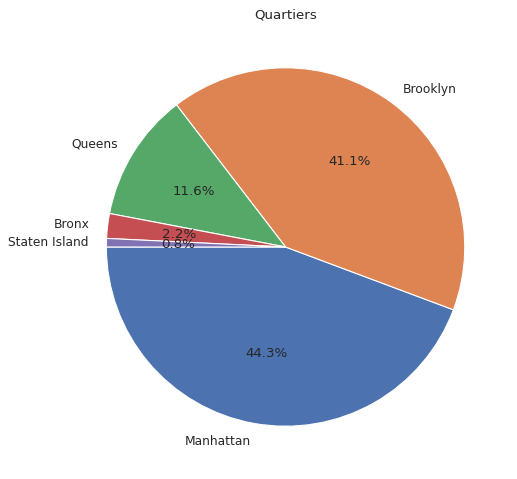

In [219]:
plt.figure(figsize=(13,7))
plt.title("Quartiers")
g = plt.pie(df.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

Le graphique nous montre que les quartiers les plus sollicités sont Manhattan et Brooklyn.

Carte du groupe de voisinage

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


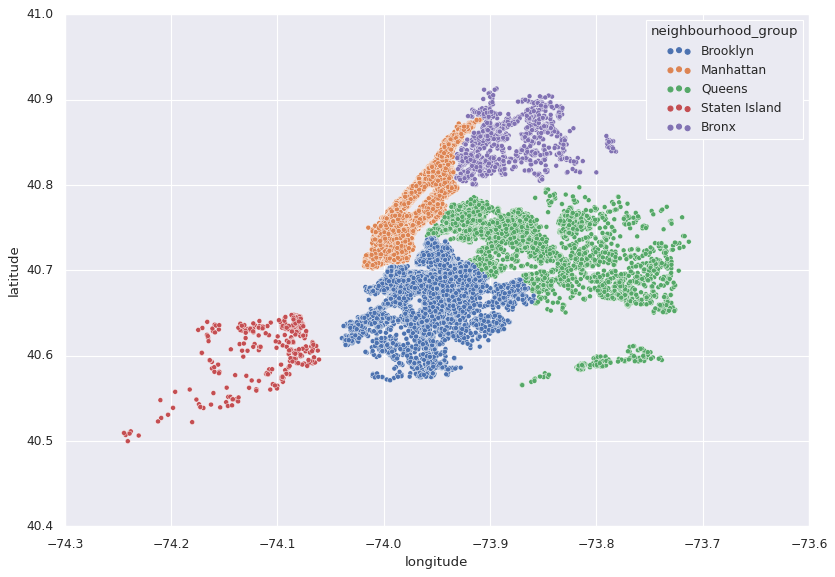

In [220]:
plot_dims=(12,8)
plt.figure(figsize=plot_dims)
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.show()

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Suppression des doublons, des colonnes inutiles.

In [222]:
columns=['id','host_id','name','host_name','last_review','calculated_host_listings_count']
df=df.drop(columns,axis=1)
df.isnull().sum()

neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
reviews_per_month      10052
availability_365           0
dtype: int64

# 3.L'impact du prix sur les réservations par quartier.
### Répartition des prix groupe de quartier

<Figure size 1040x560 with 0 Axes>

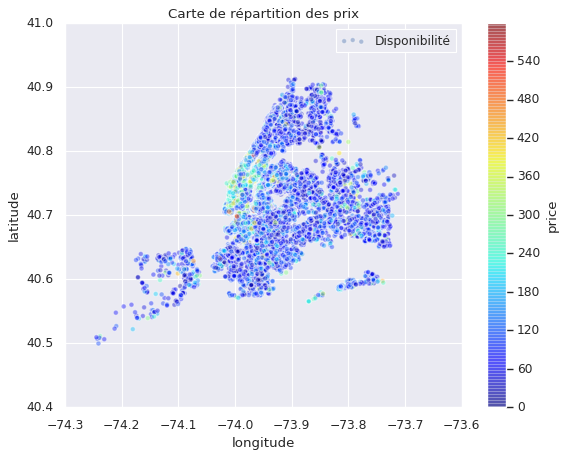

In [223]:
plt.figure(figsize=(13,7))
ax=df[df.price<600].plot(kind='scatter', x='longitude',y='latitude',label='Disponibilité',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
ax.legend()
plt.title("Carte de répartition des prix")
plt.show()

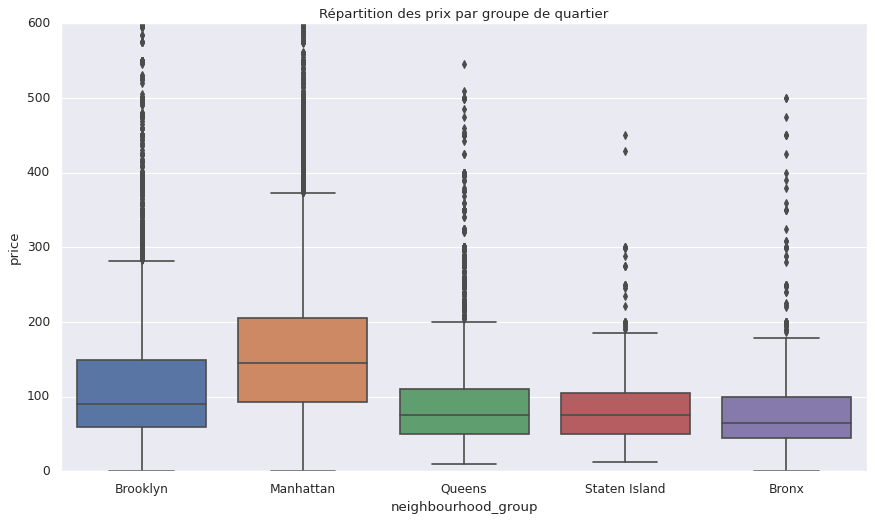

In [224]:
plt.figure(figsize=(13,7))
plt.title("Répartition des prix par groupe de quartier")
sns.boxplot(y="price",x ='neighbourhood_group' ,data = df[df.price<600])
plt.show()

Manhattan a le prix le plus élevé avec environ 140 $ en prix moyen, suivi de Brooklyn avec 90 $ par nuit.
Queens, Staten Island et le Bronx sont les moins cher.

In [225]:
df.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,0.172028
reviews_per_month,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,0.185791
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,1.000000


### 4. Types de logements sont les plus plébiscités

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


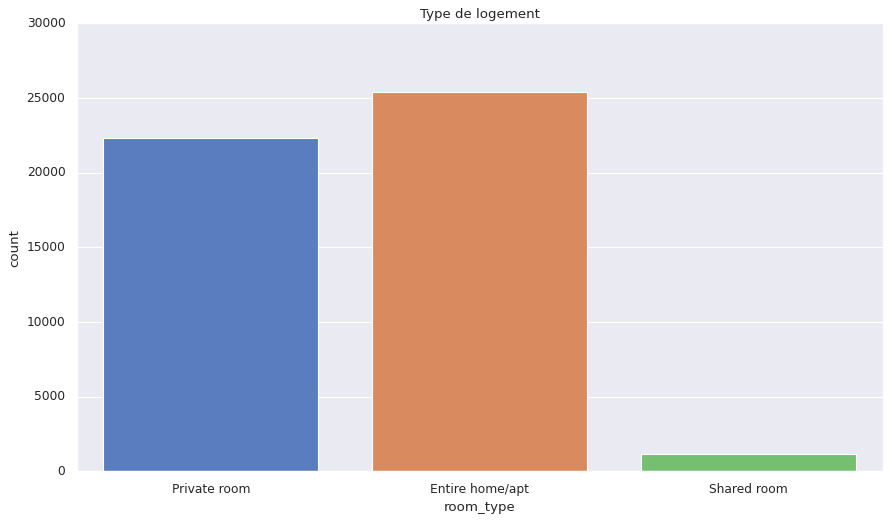

In [227]:
plt.figure(figsize=(13,7))
plt.title("Type de logement")
sns.countplot(df.room_type, palette="muted")
fig = plt.gcf()
plt.show()

### Types de logements les plus plébiscités par quartier

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


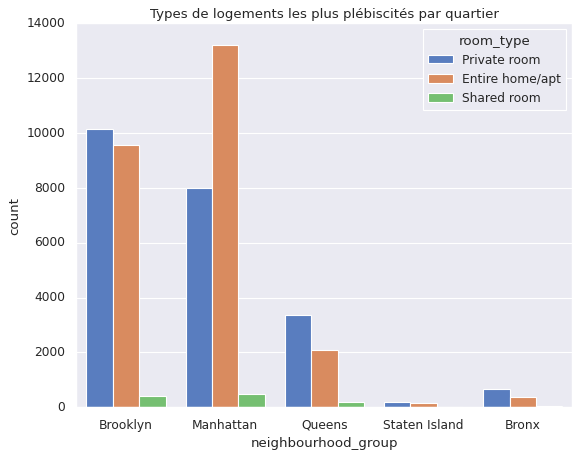

In [228]:
plt.title("Types de logements les plus plébiscités par quartier")
sns.countplot(df.neighbourhood_group,hue=df.room_type, palette="muted")
plt.show()